# OpenCV - Images Advanced
## Resizing Images - Practice

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip3 install opencv-python


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import cv2
import numpy as np

def resizeAndPad(img, size, padColor=0):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) == 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=padColor)

    return scaled_img

(200, 200, 3)

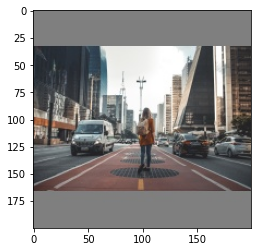

In [29]:
# Load the image
# f = 'carrot_apple.jpg'
# f = 'bus_traffic_light.jpg'
# f = 'central_market.jpg'
# f = 'friend_groups.jpg'
# f = 'fruit_basket.jpg'
# f = 'house_kitchen.jpg'
# f = 'spoon_knife.jpg'
# f = 'tv_laptop.jpg'
# f = 'vegetable.jpg'
f = 'woman_on_track.jpg'
path = 'YOLO/images/test/'+f
img = cv2.imread(path)
# Correcting coloring for MatPlotLib
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# # img = img.copy()
# # Correcting coloring for MatPlotLib
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
i = plt.imshow(img, cmap='gray')
img.shape


True

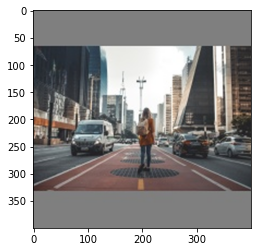

In [30]:
new_img = resizeAndPad(img, (400,400), 127)
i = plt.imshow(new_img, cmap='gray')
new_img.shape

# Correcting coloring for MatPlotLib
new_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)

# Saving the new image inside DATA folder
filename = "DATA/test/"+f
  
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, new_img)

In [ ]:
print("That´s it! Thank you once again!\nI hope will be helpful.")